# **Mental Health Data Analysis**

## **Objective:**
The goal of this notebook is to explore and analyze the mental health data to understand factors contributing to the mental health state and to develop a binary model that can classifies the state of mental health with better accuracy.

### Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from pprint import pprint
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [4]:
df = pd.read_csv('health.csv')
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,MentalHealth
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


### Data Analysis

In [7]:
df.shape

(918, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  MentalHealth    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
MentalHealth      0
dtype: int64

In [13]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,MentalHealth
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Check whether data is imbalance

In [16]:
df['MentalHealth'].value_counts()

MentalHealth
1    508
0    410
Name: count, dtype: int64

### Univariate Analysis

<Axes: xlabel='ChestPainType'>

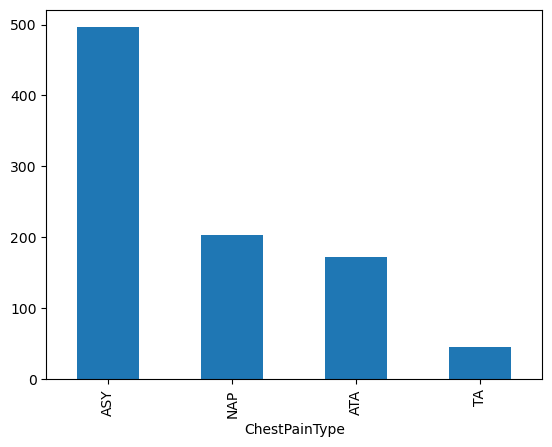

In [19]:
df['ChestPainType'].value_counts().plot(kind='bar')

Text(0.5, 0, 'RestingBP')

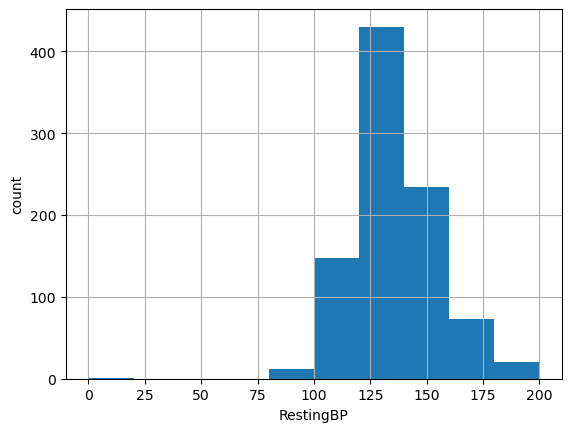

In [21]:
df['RestingBP'].hist()
plt.ylabel('count')
plt.xlabel('RestingBP')

Text(0.5, 0, 'Cholesterol')

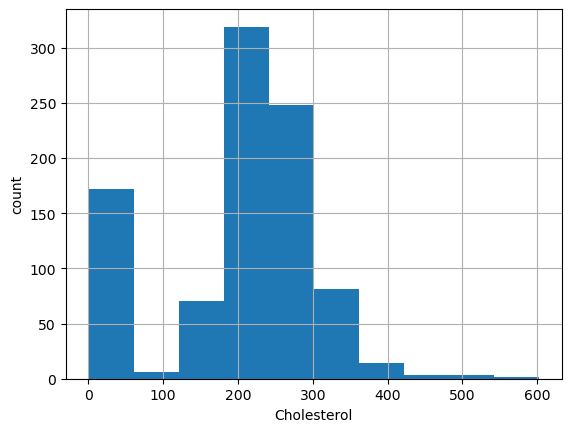

In [23]:
df['Cholesterol'].hist()
plt.ylabel('count')
plt.xlabel('Cholesterol')

### Observation
- most of the people are in range og [125,150]
- For ChestPainType, ASY category have more patients & TA category have less patients
- Most patients cholesterol is in range [180,300]

### Correlation of features

                   Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
MentalHealth  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              MentalHealth  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
MentalHealth      1.000000  


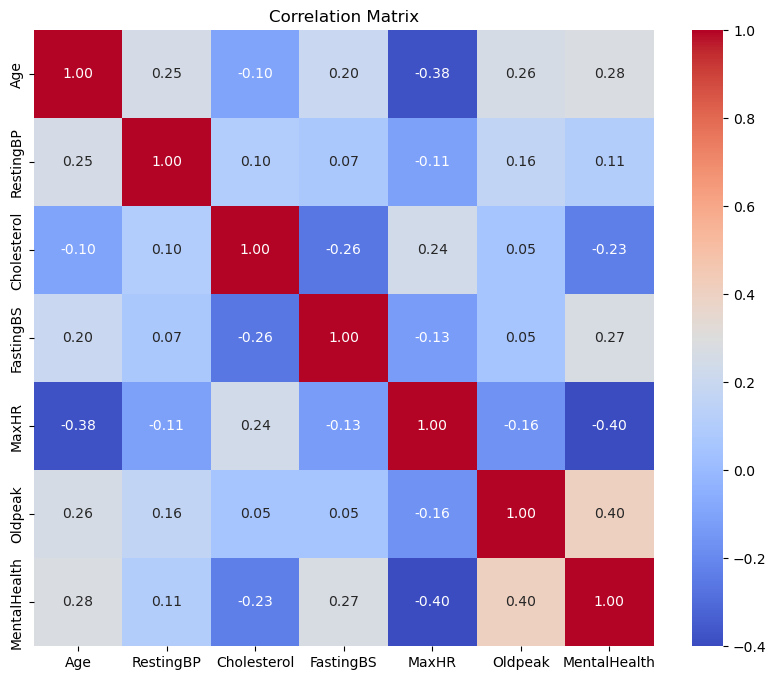

In [27]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Handling Outliers

In [30]:
column_list = ['RestingBP','Cholesterol','MaxHR','Oldpeak']

In [32]:
def outlier_identify(df, column_list):
	plt.figure(figsize=(15,15))
	for i in range(0,len(column_list)):
		col_temp = column_list[i]
		plt.subplot(2,2,i+1)
		sns.boxplot(y=df[col_temp])
		plt.xlabel(col_temp,fontsize=25)
		plt.ylabel('Values',fontsize=25)
		plt.tight_layout() 

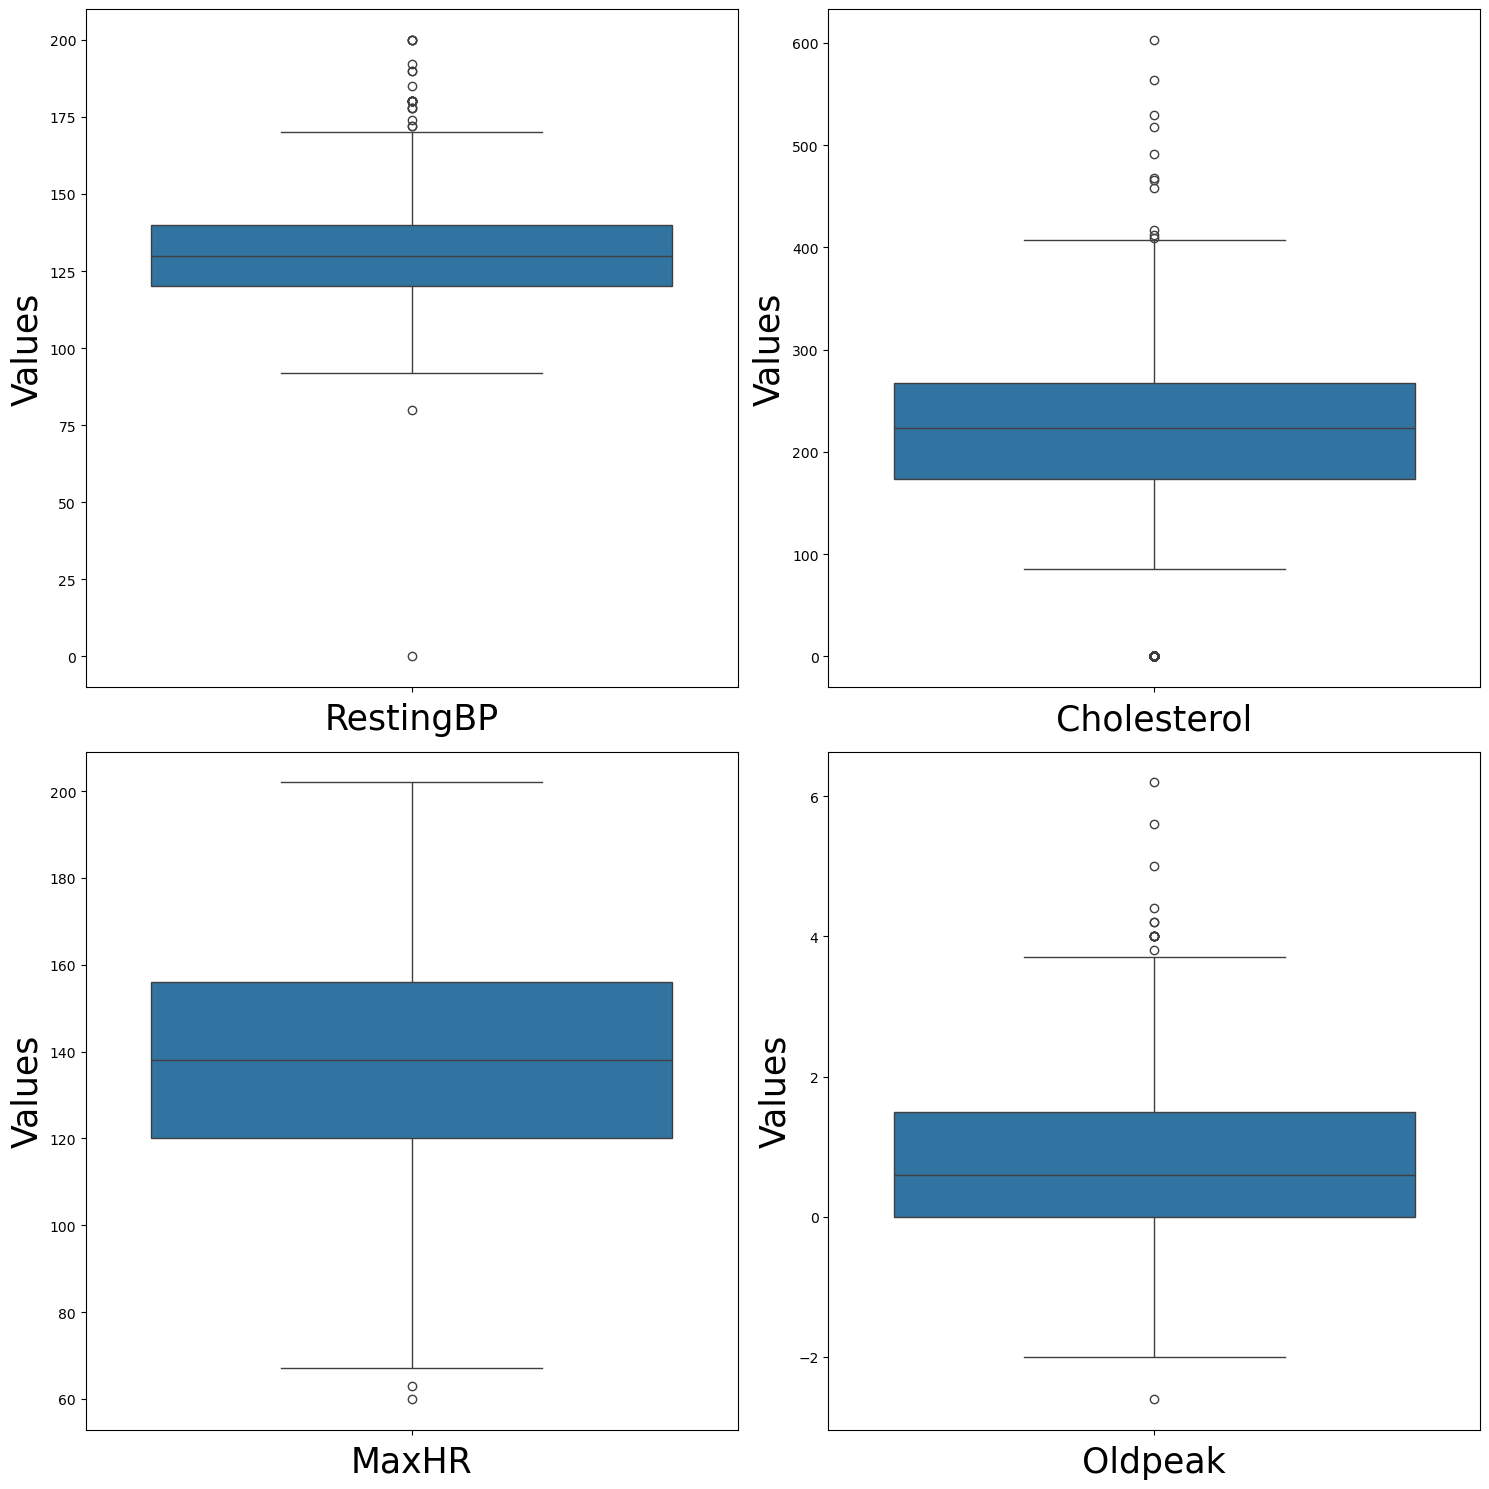

In [34]:
outlier_identify(df, column_list)

### Observation
- RestingBP has Outlier in less then 85 and greater then 175
- Cholesterol  has Outlier in less then 10 and greater then 400
- MaxHR has Outlier in less then 70
- Oldpeak has Outlier in less then -2 and greater then 3.5

In [37]:
def outlier_removal(df, column_list):
	for column in column_list:
		Q1 = df[column].quantile(0.25)
		Q3 = df[column].quantile(0.75)
		IQR = Q3 - Q1

		threshold = 1.5
		outliers = df[(df[column] < Q1 - threshold * IQR) | (df[column] > Q3 + threshold * IQR)]
		df = df.drop(outliers.index)
	return df

In [39]:
data = outlier_removal(df, column_list)

In [41]:
data.shape

(701, 12)

### Train-Test split

In [44]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [48]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(469, 11) (469,)
(232, 11) (232,)


### Handling Categorical features using Encoding

In [51]:
import category_encoders as ce
encoder =ce.OrdinalEncoder(cols=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

In [53]:
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

### Feature Scaling

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform (x_test)

### Model Building

In [59]:
def model_building(model, x_train, y_train, x_test, y_test):

	model.fit(x_train,y_train)
	y_pred = model.predict(x_test)
    
	cm = confusion_matrix(y_test,y_pred)
	accuracy = accuracy_score(y_test, y_pred)
	precision = precision_score(y_test, y_pred)
	recall = recall_score(y_test, y_pred)
	f1 = f1_score(y_test, y_pred)
    
	return [cm, accuracy, precision, recall, f1]

### [A] Logistic Regression Classifier

In [62]:
lr = LogisticRegression(max_iter=1000)
lr_metrics = model_building(lr, x_train, y_train, x_test, y_test)

In [64]:
lr_metrics

[array([[ 94,  17],
        [ 15, 106]], dtype=int64),
 0.8620689655172413,
 0.8617886178861789,
 0.8760330578512396,
 0.8688524590163934]

### [B] Decision Tree Classifier

In [67]:
dt = DecisionTreeClassifier()
dt_metrics = model_building(dt, x_train, y_train, x_test, y_test)

In [69]:
dt_metrics

[array([[90, 21],
        [26, 95]], dtype=int64),
 0.7974137931034483,
 0.8189655172413793,
 0.7851239669421488,
 0.8016877637130801]

### [C] Random Forest Classifier

In [72]:
rf = RandomForestClassifier(random_state = 42)

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [74]:
rf_metrics = model_building(rf, x_train, y_train, x_test, y_test)

In [76]:
rf_metrics

[array([[ 96,  15],
        [ 12, 109]], dtype=int64),
 0.8836206896551724,
 0.8790322580645161,
 0.9008264462809917,
 0.889795918367347]

### [D] Random Forest Classifier - Tuning with GridSearchCV

In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

In [81]:
rf_tuned = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, verbose=2, n_jobs = -1)
rf_tuned.fit(x_train, y_train)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [80, 90, 100],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [83]:
rf_tuned.best_params_

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [85]:
rf_tuned.best_score_

0.8677391257009092

In [87]:
best_tuned = rf_tuned.best_estimator_
rf_tuned_metrics = model_building(best_tuned, x_train, y_train, x_test, y_test)
rf_tuned_metrics

[array([[ 94,  17],
        [ 12, 109]], dtype=int64),
 0.875,
 0.8650793650793651,
 0.9008264462809917,
 0.8825910931174089]

### [E] Random Forest - Tuning with RandomizedSearchCV

In [96]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 3000, num = 10)]
max_features = [2,4,6, 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 150, num = 15)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [98]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [100]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      130, 140, 150, None],
                                        'max_features': [2, 4, 6, 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 511, 822, 1133,
                                                         1444, 1755, 2066, 2377,
                                                         2688, 3000]},
                   random_state=42, verbose=2)

In [102]:
rf_random.best_params_

{'n_estimators': 511,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 120,
 'bootstrap': True}

In [104]:
best_random = rf_random.best_estimator_

In [106]:
rf_random_metrics = model_building(best_random, x_train, y_train, x_test, y_test)
rf_random_metrics

[array([[ 94,  17],
        [ 13, 108]], dtype=int64),
 0.8706896551724138,
 0.864,
 0.8925619834710744,
 0.8780487804878049]

### View of all Algorithm Performances

In [108]:
name = ['LR','DT','RF', 'RF Tuning', 'RF Random Tuning']
score = [lr_metrics[1], dt_metrics[1], rf_metrics[1], rf_tuned_metrics[1], rf_random_metrics[1]]

In [110]:
result = {name[i]: 100*score[i] for i in range(len(name))}

In [112]:
result

{'LR': 86.20689655172413,
 'DT': 79.74137931034483,
 'RF': 88.36206896551724,
 'RF Tuning': 87.5,
 'RF Random Tuning': 87.06896551724138}

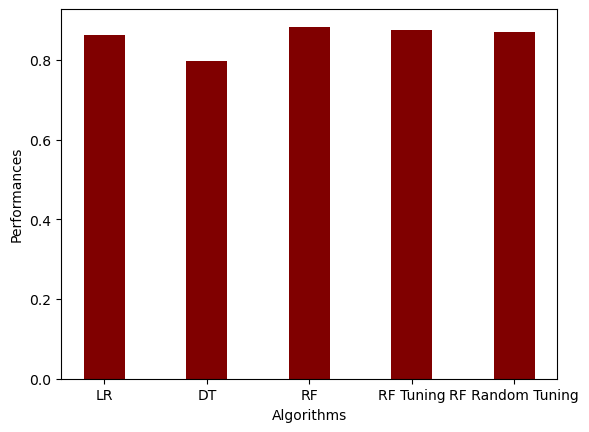

In [114]:
plt.bar(name, score, color ='maroon', width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Performances")
plt.show()

### Predict with new data

In [118]:
import pickle
pickle.dump(best_tuned, open('model.pkl','wb'))

In [122]:
check = [ 1.22187745, -1.80655373, -1.34414367,  1.91980976,  1.45074064,
       -0.42586406, -1.33722297,  0.5891485 , 0.73328365,  0.00814149,
       -0.60283668]

In [124]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict([check]))

[0]
